# *k*-Nearest Neighbor (*k*NN)

*k*NN has no model other than storing the entire dataset, so there is no learning required. All of the work happens at
the time a prediction is requested and that's why is often referred to as a lazy learning algorithm. Since it makes no assumptions about the functional form of the problem
being solved, it is referred to as a nonparametric machine learning algorithm [1].

## Import Libraries<a id='libraries'></a>

In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
sb.set_style('whitegrid')

## Sample Dataset<a id='sample'></a>

In [21]:
x1 = [3.393533211, 3.110073483, 1.343808831, 3.582294042, 2.280362439, 
      7.423436942, 5.745051997, 9.172168622, 7.792783481, 7.939820817]

x2 = [2.331273381, 1.781539638, 3.368360954, 4.67917911, 2.866990263, 
      4.696522875, 3.533989803, 2.511101045, 3.424088941, 0.791637231]

y = [0, 0, 0, 0, 0, 1, 1, 1, 1, 1]

df = pd.DataFrame(zip(x1, x2, y), columns=['x1', 'x2', 'y'])
df

,x1,x2,y
0,3.393533,2.331273,0
1,3.110073,1.781540,0
2,1.343809,3.368361,0
3,3.582294,4.679179,0
4,2.280362,2.866990,0
5,7.423437,4.696523,1
6,5.745052,3.533990,1
7,9.172169,2.511101,1
8,7.792783,3.424089,1
9,7.939821,0.791637,1


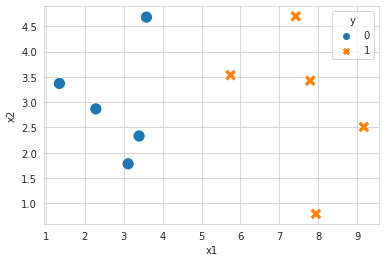

In [22]:
sb.scatterplot(data=df, x='x1', y='x2', hue='y', style='y', s=150)
plt.show()

In [23]:
# New instance
new_x1 = 8.093607318
new_x2 = 3.365731514

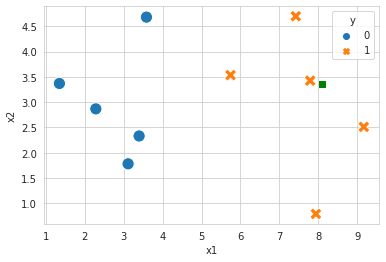

In [24]:
# Displaying the place of new instance on plot
sb.scatterplot(data=df, x='x1', y='x2', hue='y', style='y', s=150)
plt.scatter(x=new_x1, y=new_x2, color='g', marker=',')
plt.show()

## Manual Implementation<a id='manual'></a>

$$Euclidean Distance (a,b) = \sqrt{\sum_{i=1}^{n}(a_i - b_I)^2}$$

In [25]:
# Calculating the Euclidean distance of each point to the new instance 
df_pred = df.copy()
df_pred['x1-new_x1'] = np.square(df_pred['x1'] - new_x1)
df_pred['x2-new_x2'] = np.square(df_pred['x2'] - new_x2)
df_pred['Sum'] = df_pred['x1-new_x1'] + df_pred['x2-new_x2']
df_pred['Distance'] = np.sqrt(df_pred['Sum'])
df_pred

,x1,x2,y,x1-new_x1,x2-new_x2,Sum,Distance
0,3.393533,2.331273,0,22.090697,1.070104,23.160800,4.812567
1,3.110073,1.781540,0,24.835609,2.509664,27.345273,5.229271
2,1.343809,3.368361,0,45.559780,0.000007,45.559787,6.749799
3,3.582294,4.679179,0,20.351947,1.725145,22.077092,4.698627
4,2.280362,2.866990,0,33.793816,0.248743,34.042559,5.834600
5,7.423437,4.696523,1,0.449128,1.771006,2.220134,1.490011
6,5.745052,3.533990,1,5.515712,0.028311,5.544023,2.354575
7,9.172169,2.511101,1,1.163294,0.730393,1.893688,1.376113
8,7.792783,3.424089,1,0.090495,0.003406,0.093901,0.306432
9,7.939821,0.791637,1,0.023650,6.625961,6.649612,2.578684


In [26]:
# Number of neighbors
k = 3 

In [27]:
# Sorting the dataset by distance which are closest points to the new instance
df_pred = df_pred.sort_values(by=['Distance'], ascending=True)
df_pred = df_pred.reset_index()

In [28]:
# Adding new column indicator of a point if neighbor to the new instance with default NO value
df_pred['Neighbor'] = 'NO'

In [29]:
# Marking k neighbor to the new instances
for i in range(k):
    df_pred.loc[i, 'Neighbor'] = 'YES'

df_pred

,index,x1,x2,y,x1-new_x1,x2-new_x2,Sum,Distance,Neighbor
0,8,7.792783,3.424089,1,0.090495,0.003406,0.093901,0.306432,YES
1,7,9.172169,2.511101,1,1.163294,0.730393,1.893688,1.376113,YES
2,5,7.423437,4.696523,1,0.449128,1.771006,2.220134,1.490011,YES
3,6,5.745052,3.533990,1,5.515712,0.028311,5.544023,2.354575,NO
4,9,7.939821,0.791637,1,0.023650,6.625961,6.649612,2.578684,NO
5,3,3.582294,4.679179,0,20.351947,1.725145,22.077092,4.698627,NO
6,0,3.393533,2.331273,0,22.090697,1.070104,23.160800,4.812567,NO
7,1,3.110073,1.781540,0,24.835609,2.509664,27.345273,5.229271,NO
8,4,2.280362,2.866990,0,33.793816,0.248743,34.042559,5.834600,NO
9,2,1.343809,3.368361,0,45.559780,0.000007,45.559787,6.749799,NO


In [30]:
# Filtering out neighbors to the new instance
df_pred['y'][df_pred['Neighbor'] == 'YES']

0    1
1    1
2    1
Name: y, dtype: int64

In [31]:
# Getting mode of label of the neighbors to decide the class of the new instance 
import statistics
statistics.mode(df_pred['y'][df_pred['Neighbor'] == 'YES'])

1

🔎 It estimated the new instance as 1. It can be also noticed that the point on the plot is closer to the 1s than 0s.

## KNeighborsClassifier

We'll us the [`KNeighborsClassifier`](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html) function from `sklearn` library.

In [32]:
from sklearn.neighbors import KNeighborsClassifier

In [33]:
model = KNeighborsClassifier(n_neighbors=3, metric='euclidean')
x = df.drop('y', axis=1)
y = df['y']
model.fit(x, y)
x_test = [[new_x1, new_x2]]
y_hat = model.predict(x_test)
y_hat

/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


array([1])

## Iris Dataset<a id='iris'></a>

We'll classify the flowers in Iris dataset using `KNeighborsClassifier` from `sklearn` library.

In [34]:
# Load the dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
names = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'Class']
dataset = pd.read_csv(url, names=names)
dataset.head()

,sepal-length,sepal-width,petal-length,petal-width,Class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [46]:
dataset.describe().loc[['min', 'max']]

,sepal-length,sepal-width,petal-length,petal-width,Class
min,4.3,2.0,1.0,0.1,0.0
max,7.9,4.4,6.9,2.5,2.0


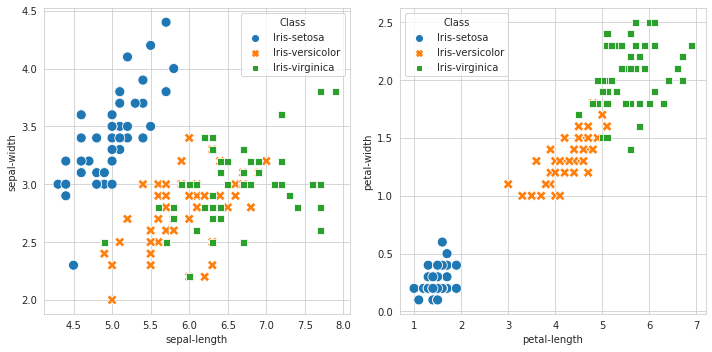

In [35]:
# Checking the relation between the label and the numerical features
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
sb.scatterplot(ax=axes[0], data=dataset, x='sepal-length', y='sepal-width', hue='Class', style='Class', s=100)
sb.scatterplot(ax=axes[1], data=dataset, x='petal-length', y='petal-width', hue='Class', style='Class', s=100)
plt.tight_layout()
plt.show()

In [37]:
# Replace the string labels with numeric values
dataset.replace({'Class': {'Iris-setosa': 0, 'Iris-versicolor': 1, 'Iris-virginica': 2}}, inplace=True)

In [36]:
from sklearn.model_selection import train_test_split

In [38]:
x = dataset.drop('Class', axis=1)
y = dataset['Class']
# Split the data as train and test
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=101)

In [39]:
# Train the data for 3 neighbors with Euclidean distance
model = KNeighborsClassifier(n_neighbors=3, metric='euclidean')
model.fit(x_train, y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=3)

In [40]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [41]:
y_hat = model.predict(x_test)
acc = accuracy_score(y_test, y_hat) * 100
print('Accuracy: {:.2f}%'.format(acc))

Accuracy: 100.00%


🔎 *k*NN provided perfect accuracy score which is 100% for the Iris dataset.

In [42]:
print(classification_report(y_test, y_hat))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00        12
           2       1.00      1.00      1.00         8

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



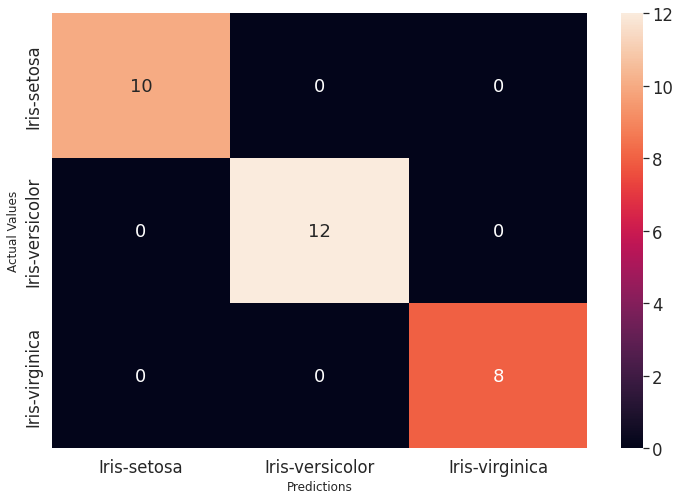

In [43]:
# Display the confusion matrix
cm = confusion_matrix(y_test, y_hat)
labels = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
pred_labels = [l for l in labels]
cm_df = pd.DataFrame(cm, index=labels, columns=pred_labels)

sb.set(font_scale=1.5)
plt.figure(figsize=(12,8))
sb.heatmap(cm_df, annot=True, fmt='d')
plt.xlabel('Predictions', fontsize=12)
plt.ylabel('Actual Values', fontsize=12)
plt.show()

## Conclusion<a id='conclusion'></a>

Curse of Dimensionality

## References

[1] [Master Machine Learning Algorithms](https://machinelearningmastery.com/master-machine-learning-algorithms/)